In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [14]:
df = pd.read_csv(f'dataset/pokemon_preprocessed.csv')

In [15]:
df

,name,weight_kg,height_m,attack,defense,sp_attack,sp_defense,type1
0,Bulbasaur,6.9,0.7,49,49,65,65,grass
1,Ivysaur,13.0,1.0,62,63,80,80,grass
2,Venusaur,100.0,2.0,100,123,122,120,grass
3,Charmander,8.5,0.6,52,43,60,50,fire
4,Charmeleon,19.0,1.1,64,58,80,65,fire
...,...,...,...,...,...,...,...,...
775,Celesteela,999.9,9.2,101,103,107,101,steel
776,Kartana,0.1,0.3,181,131,59,31,grass
777,Guzzlord,888.0,5.5,101,53,97,53,dark
778,Necrozma,230.0,2.4,107,101,127,89,psychic


In [17]:
df.sort_values(by='name')

,name,weight_kg,height_m,attack,defense,sp_attack,sp_defense,type1
441,Abomasnow,135.5,2.2,132,105,132,105,grass
51,Abra,19.5,0.9,20,15,105,55,psychic
340,Absol,47.0,1.2,150,60,115,60,dark
598,Accelgor,25.3,0.8,70,40,100,60,bug
662,Aegislash,53.0,1.7,150,50,150,50,steel
...,...,...,...,...,...,...,...,...
552,Zoroark,81.1,1.6,105,60,120,60,dark
551,Zorua,12.5,0.7,65,40,80,40,dark
33,Zubat,7.5,0.8,45,35,30,40,poison
615,Zweilous,50.0,1.4,85,70,65,70,dark


(array([127., 186., 130.,  38.,  46.,  79.,  41.,  50.,  56.,  27.]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <BarContainer object of 10 artists>)

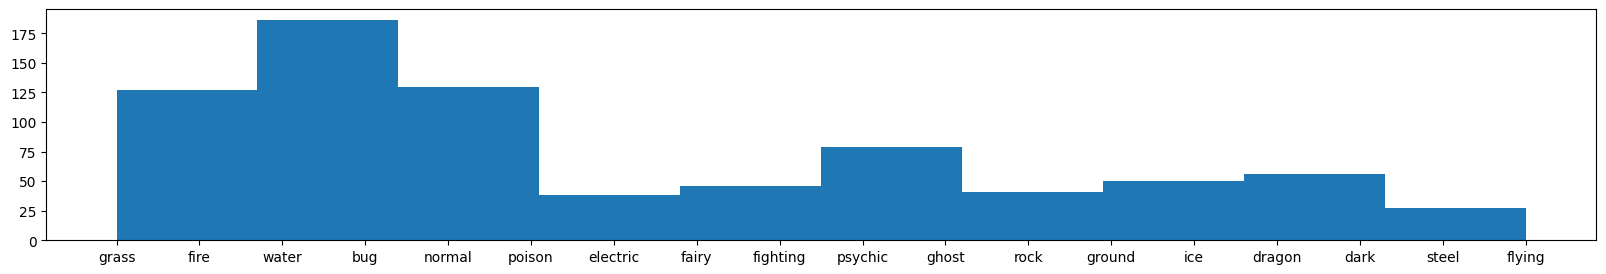

In [8]:
plt.figure(figsize=(20,3))
plt.hist(df['type1'])

In [6]:
df['weight_kg']

0        6.9
1       13.0
2      100.0
3        8.5
4       19.0
       ...  
775    999.9
776      0.1
777    888.0
778    230.0
779     80.5
Name: weight_kg, Length: 780, dtype: float64

<Axes: >

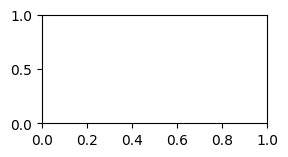

In [7]:
plt.subplot(3,2,1)

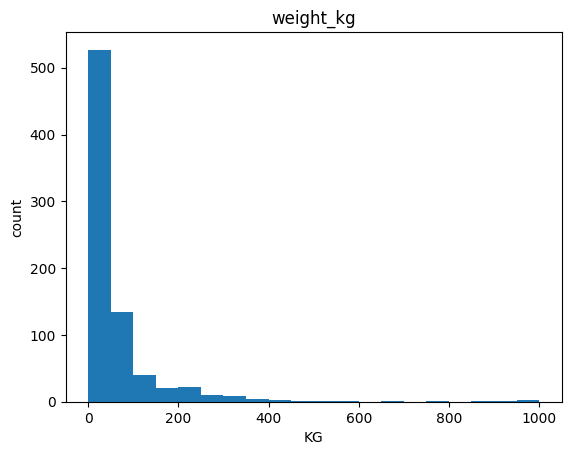

In [8]:
plt.hist(df['weight_kg'], bins = 20)
plt.title('weight_kg')
plt.xlabel('KG')
plt.ylabel('count')
#plt.savefig('weight_kg.png')

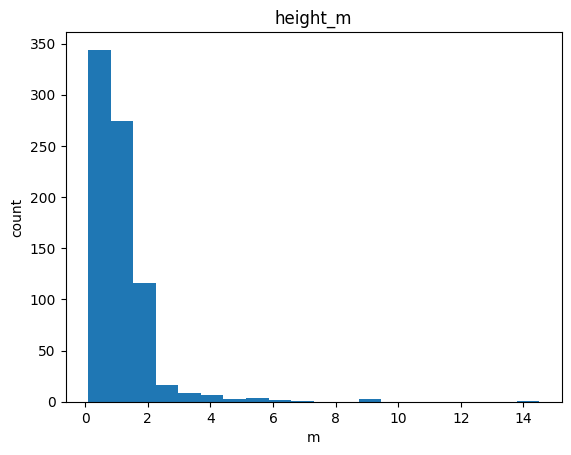

In [9]:
plt.hist(df['height_m'], bins = 20)
plt.title('height_m')
plt.xlabel('m')
plt.ylabel('count')
##plt.savefig('height_m.png')


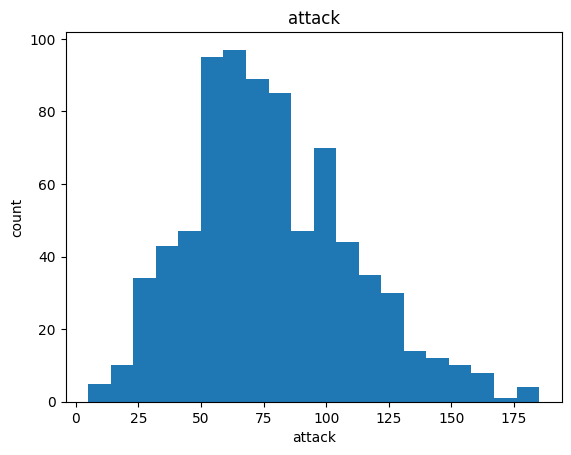

In [10]:
plt.hist(df['attack'], bins = 20)
plt.title('attack')
plt.xlabel('attack')
plt.ylabel('count')
##plt.savefig('attack.png')

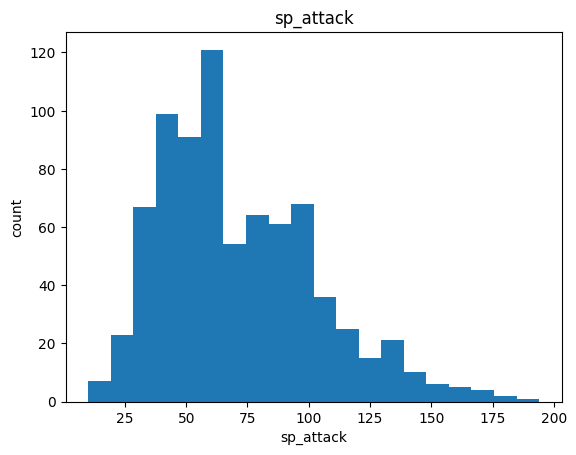

In [11]:
plt.hist(df['sp_attack'], bins = 20)
plt.title('sp_attack')
plt.xlabel('sp_attack')
plt.ylabel('count')
#plt.savefig('sp_attack.png')

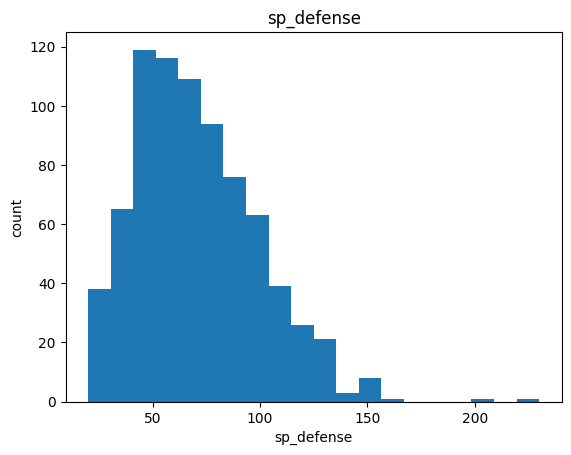

In [12]:
plt.hist(df['sp_defense'], bins = 20)
plt.title('sp_defense')
plt.xlabel('sp_defense')
plt.ylabel('count')
#plt.savefig('sp_defense.png')

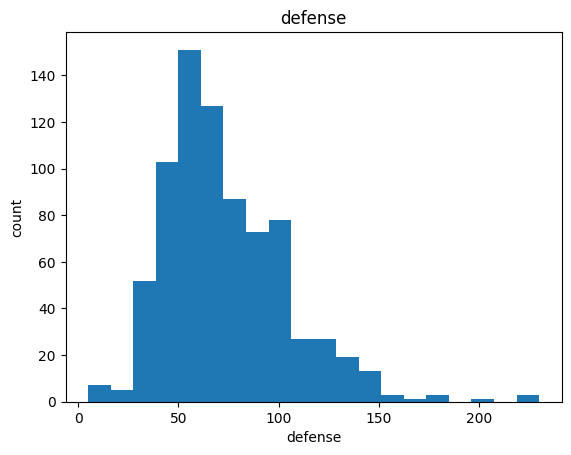

In [13]:
plt.hist(df['defense'], bins = 20)
plt.title('defense')
plt.xlabel('defense')
plt.ylabel('count')
#plt.savefig('defense.png')

In [14]:

for column in df.columns:
    if column in ['name', 'type1']:
        continue
    print(column)
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*1.5
    
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
    
    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    print(outlier_idx)
    df.drop(outlier_idx, axis=0, inplace=True)

weight_kg
Index([ 47,  78, 111, 112, 124, 130, 189, 207, 211, 224, 225, 226, 228, 229,
       230, 231, 278, 287, 302, 304, 318, 319, 331, 343, 346, 356, 357, 358,
       359, 360, 363, 364, 365, 370, 392, 418, 431, 443, 445, 454, 457, 464,
       465, 466, 467, 468, 474, 481, 507, 526, 539, 595, 596, 604, 616, 619,
       620, 621, 624, 625, 627, 678, 680, 687, 694, 697, 698, 699, 701, 720,
       729, 749, 754, 758, 759, 768, 769, 772, 775, 777, 778],
      dtype='int64')
height_m
Index([21, 129, 317, 478, 770, 774], dtype='int64')
attack
Index([108, 195, 238, 270, 335, 390, 426, 456, 700, 776], dtype='int64')
defense
Index([65, 74, 186, 193, 194, 208, 286, 305, 544, 661, 684, 727, 747], dtype='int64')
sp_attack
Index([5, 53, 77, 131, 162, 263, 362, 639], dtype='int64')
sp_defense
Index([223, 361, 458, 652, 725, 731, 771], dtype='int64')


In [15]:
df.columns

Index(['name', 'weight_kg', 'height_m', 'attack', 'defense', 'sp_attack',
       'sp_defense', 'type1'],
      dtype='object')

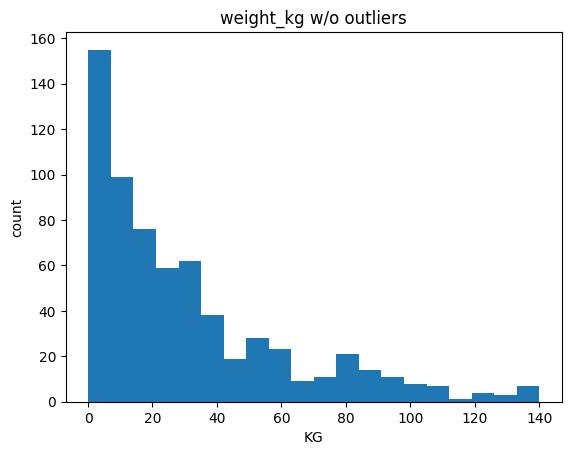

In [16]:
plt.hist(df['weight_kg'], bins = 20)
plt.title('weight_kg w/o outliers')
plt.xlabel('KG')
plt.ylabel('count')
#plt.savefig('weight_kg_without_outliers.png')

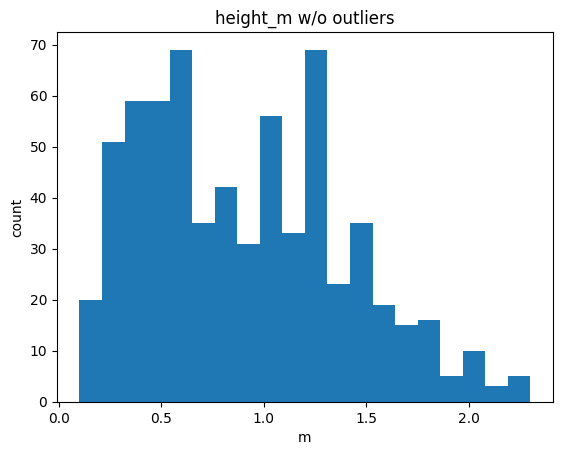

In [17]:
plt.hist(df['height_m'], bins = 20)
plt.title('height_m w/o outliers')
plt.xlabel('m')
plt.ylabel('count')
#plt.savefig('height_m_without_outliers.png')

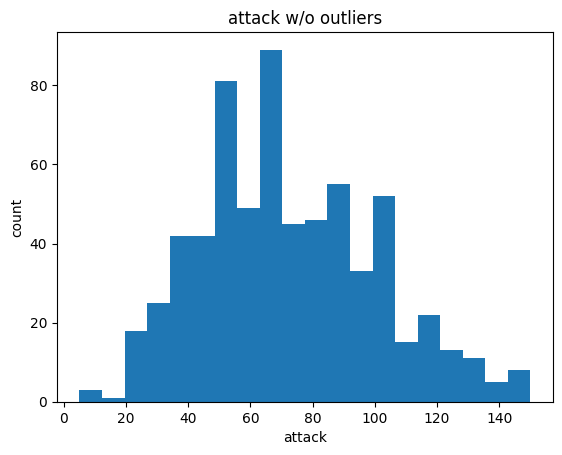

In [18]:
plt.hist(df['attack'], bins = 20)
plt.title('attack w/o outliers')
plt.xlabel('attack')
plt.ylabel('count')
#plt.savefig('attack_without_outliers.png')

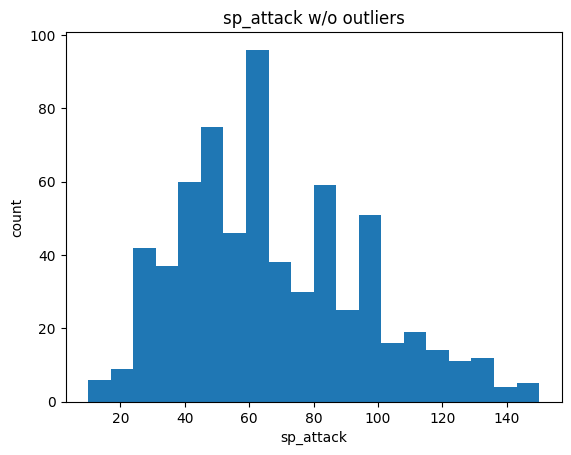

In [19]:
plt.hist(df['sp_attack'], bins = 20)
plt.title('sp_attack w/o outliers')
plt.xlabel('sp_attack')
plt.ylabel('count')
#plt.savefig('sp_attack_without_outliers.png')

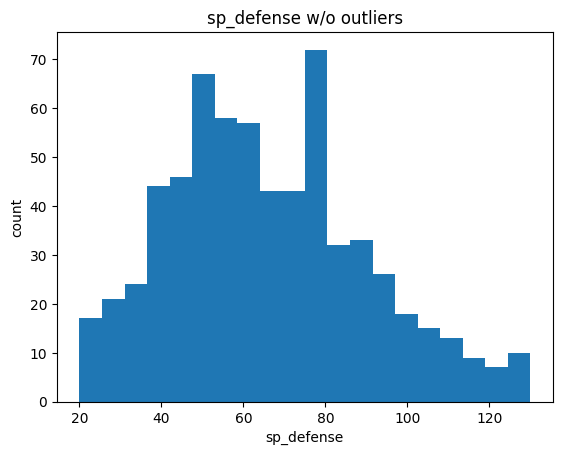

In [20]:
plt.hist(df['sp_defense'], bins = 20)
plt.title('sp_defense w/o outliers')
plt.xlabel('sp_defense')
plt.ylabel('count')
#plt.savefig('sp_defense_without_outliers.png')

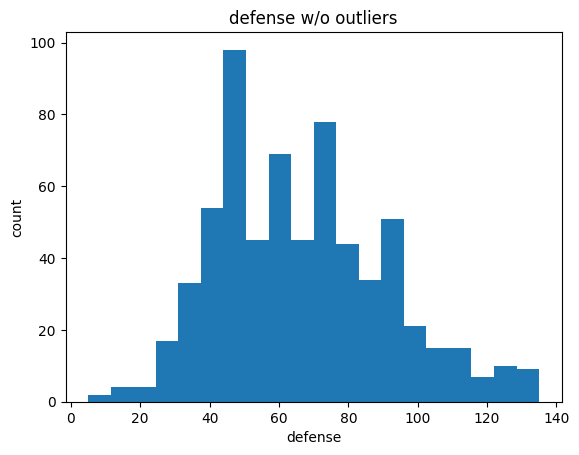

In [21]:
plt.hist(df['defense'], bins = 20)
plt.title('defense w/o outliers')
plt.xlabel('defense')
plt.ylabel('count')
#plt.savefig('defense_without_outliers.png')

In [22]:
df.to_csv('dataset/pokemon_preprocessed_without_outliers.csv', index=False)

In [9]:
df = pd.DataFrame(    {        "col1": ["a", "a", "b", "b", "a"],        "col2": [1.0, 2.0, 3.0, np.nan, 5.0],        "col3": [1.0, 2.0, 3.0, 4.0, 5.0]    },    columns=["col1", "col2", "col3"],)


In [10]:
df

,col1,col2,col3
0,a,1.0,1.0
1,a,2.0,2.0
2,b,3.0,3.0
3,b,NaN,4.0
4,a,5.0,5.0


In [13]:
len(df['col2'].compare(df['col3']))

1

In [52]:
import torch

In [53]:
pred = torch.rand(10,18)
target = torch.randint(0,18,(10,))

In [54]:
def cross_entropy_loss(x, y, eps = 1e-7):
    return -torch.sum(y*torch.log(x+eps))

In [55]:
def Focal__loss(x, y, gamma = 1,eps = 1e-7):
    p_t = abs(y - x) 
    return -torch.sum(((1-p_t)**gamma)*torch.log(p_t+eps))

In [56]:
target = torch.nn.functional.one_hot(target,18)

In [57]:
Focal__loss(pred,target)

tensor(132.3635)